# Exercise Chapter 10_ex 
Industrial Statistics: A Computer Based Approach with Python<br>
by Ron Kenett, Shelemyahu Zacks, Peter Gedeck

Publisher: Springer International Publishing; 1st edition (2023) <br>
<!-- ISBN-13: 978-3031075650 -->

(c) 2022 Ron Kenett, Shelemyahu Zacks, Peter Gedeck

The code needs to be executed in sequence.

Python packages and Python itself change over time. This can cause warnings or errors. We
"Warnings" are for information only and can usually be ignored. 
"Errors" will stop execution and need to be fixed in order to get results. 

If you come across an issue with the code, please follow these steps

- Check the repository (https://gedeck.github.io/mistat-code-solutions/) to see if the code has been upgraded. This might solve the problem.
- Report the problem using the issue tracker at https://github.com/gedeck/mistat-code-solutions/issues
- Paste the error message into Google and see if someone else already found a solution

In [1]:
import os
os.environ['OUTDATED_IGNORE'] = '1'
import warnings
from outdated import OutdatedPackageWarning
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=OutdatedPackageWarning)

In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.formula.api as smf
import lifelines
import pingouin as pg
import seaborn as sns
import matplotlib.pyplot as plt
import mistat

# Exercise 3

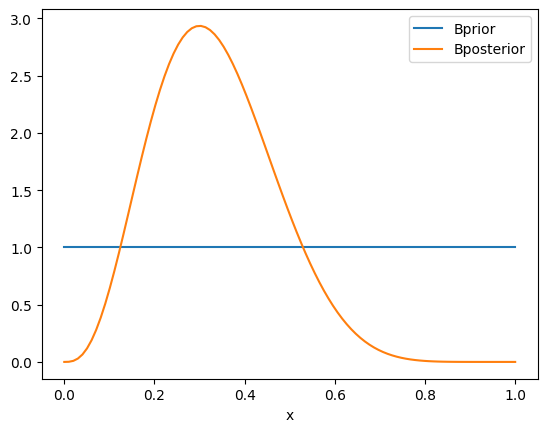

In [3]:
x = np.linspace(0, 1, 100)
df = pd.DataFrame({'x': x, 'Bprior': stats.beta(1,1).pdf(x)})
df['Bposterior'] = stats.beta(1+3,1 + 10 - 3).pdf(x)

ax = df.plot(x='x', y='Bprior')
df.plot(x='x', y='Bposterior', ax=ax)
plt.show()

# Exercise 5

In [4]:
n = 50; Kn = 49
medFdist = stats.f.ppf(0.5, 2*Kn+2, 2*n+2-2*Kn)
R_t = (Kn+1) * medFdist / (n+1 -Kn+(Kn+1)*medFdist)
R_t

0.9673091500837799

# Exercise 6

In [5]:
v1 = 2.5; v2 = 2.75; v3 = 3; n=r=10
tau = 1/1000
T1 = 4565; T2 = 5720; T3 = 7505
def R(t, Ti, tau, r, v):
    return ((1 + Ti*tau)/(1+(Ti + t)*tau))**(r+v)
t = np.linspace(0, 3000, 100)
df = pd.DataFrame({
    't': t,
    'R1': R(t, T1, tau, r, v1),
    'R2': R(t, T2, tau, r, v2),
    'R3': R(t, T3, tau, r, v3),
})
df['Rsys'] = df['R3'] + df['R1']*df['R2'] - df['R1']*df['R2']*df['R3']

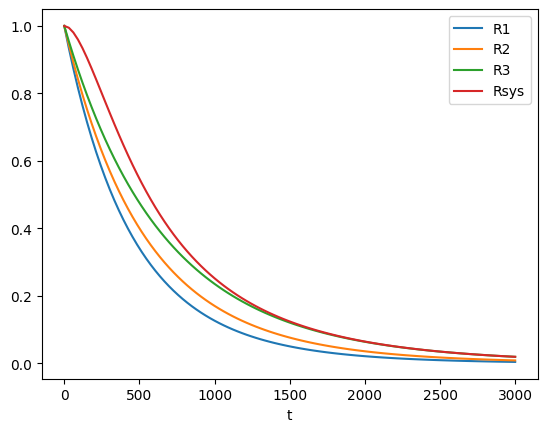

In [6]:
df.plot(x='t')
plt.show()

# Exercise 7

In [7]:
n = 30
Kn = 28
gamma = 0.95

v1 = Kn + 1; v2 = n - Kn + 1
eps1 = (1-gamma)/2; eps2 = (1+gamma)/2

F_ll = stats.f.ppf(eps2, 2*n+2-2*Kn, 2*Kn+2)
F_ul = stats.f.ppf(eps2, 2*Kn+2, 2*n+2-2*Kn)
print(f'F-distribution median: ({F_ll:.3f}, {F_ul:.3f})')
F_50 = stats.f.ppf(0.5, 2*Kn+2, 2*n+2-2*Kn)

R_t = (Kn+1)*F_50 / ((n+1-Kn) + (Kn+1)*F_50)
print(f'R(t): {R_t:.3f}')
LL = (Kn+1) / ((Kn+1) + (n-Kn+1)*F_ll)
UL = (Kn+1)*F_ul / ((n-Kn+1)+(Kn+1)*F_ul)
print(f'Credibility limits: ({LL:.3f}, {UL:.3f})')

F-distribution median: (2.635, 4.963)
R(t): 0.915
Credibility limits: (0.786, 0.980)


# Exercise 8

In [8]:
gamma = 0.95
t = 25
nu = 3
tau = 0.01
r = 27
Tnr = 3500

eps1 = (1-gamma)/2; eps2 = (1+gamma)/2

beta_L = (Tnr + 1/tau) / stats.gamma.ppf(eps2, nu+r, 1)
beta_U = (Tnr + 1/tau) / stats.gamma.ppf(eps1, nu+r, 1)
print(f'Credibility limits beta: ({beta_L:.2f}, {beta_U:.2f})')

RL = np.exp(-t / beta_L)
RU = np.exp(-t / beta_U)
RL, RU
print(f'Credibility limits R(50): ({RL:.3f}, {RU:.3f})')

Credibility limits beta: (84.41, 169.48)
Credibility limits R(50): (0.744, 0.863)


# Exercise 9

In [9]:
s = 2
eps1 = (1-gamma)/2; eps2 = (1+gamma)/2

# using beta
T_L = (Tnr + 1/tau)*(1/stats.beta.ppf(eps2, nu+r, s) - 1)
T_U = (Tnr + 1/tau)*(1/stats.beta.ppf(eps1, nu+r, s) - 1)
print(f'Prediction interval: ({T_L:.3f}, {T_U:.3f})')

# using F
T_L = (Tnr + 1/tau)*(s / (nu+r)) * stats.f.ppf(eps1, 2*s, 2*nu+2*r)
T_U = (Tnr + 1/tau)*(s / (nu+r)) * stats.f.ppf(eps2, 2*s, 2*nu+2*r)
print(f'Prediction interval: ({T_L:.3f}, {T_U:.3f})')

Prediction interval: (28.707, 721.838)
Prediction interval: (28.707, 721.838)


# Exercise 10

In [10]:
n = 100
U = 10_050  # sum(TTF)
V = 500 / 60 # sum(TTR) 

lambda_ = 1/U  # ~ G(nu, tau)
mu = 1/V # ~ G(omega, zeta)
A_infty = mu / (mu + lambda_)
print(f'A_inf: {A_infty:.5f}')

# prior distributions
nu = 4; tau = 0.0004  # lambda~G(2, 0.001)
omega = 4; zeta = 0.01 / 60  # mu~G(2, 0.005)

# Crediblity interval
gamma = 0.95
eps1 = (1-gamma)/2; eps2 = (1+gamma)/2

A_infty_eps1 = 1/(1 + (V+zeta)/(U+tau) * 
                  stats.beta.ppf(eps2, n+nu, n+omega)/stats.beta.ppf(eps1, n+omega, n+nu))
A_infty_eps2 = 1/(1 + (V+zeta)/(U+tau) * 
                  stats.beta.ppf(eps1, n+nu, n+omega)/stats.beta.ppf(eps2, n+omega, n+nu))
print(f'A_inf_eps1: {A_infty_eps1:.5f}')
print(f'A_inf_eps2: {A_infty_eps2:.5f}')

A_inf: 0.99917
A_inf_eps1: 0.99891
A_inf_eps2: 0.99937


# Exercise 11

In [11]:
freq_dist = {
  0: 4, 1: 21, 2: 29, 3: 32, 4: 19, 5: 14,
  6: 13, 7: 5, 8: 8, 9: 5, 10: 9, 11: 1,
  12: 2, 13: 4, 14: 4, 15: 1, 16: 4, 17: 2,
  18: 1, 19: 1, 20: 1, 21: 1, 22: 1, 23: 2,
  24: 1, 25: 2, 26: 1}

n = sum(count for value, count in freq_dist.items())
M_1 = sum(value * count for value, count in freq_dist.items()) / n
M_2 = sum(value * value * count for value, count in freq_dist.items()) / n
print(n, M_1, M_2)

188 6.037234042553192 68.48404255319149


In [12]:
tau = M_2 / M_1
nu = M_1*M_1 / M_2
lambda_ = nu * tau
print(tau, nu, lambda_)

11.343612334801762 0.5322144185085728 6.037234042553193


In [13]:
freq_dist[8] += 1
n = sum(count for value, count in freq_dist.items())
M_1 = sum(value * count for value, count in freq_dist.items()) / n
M_2 = sum(value * value * count for value, count in freq_dist.items()) / n

tau = M_2 / M_1
nu = M_1*M_1 / M_2
lambda_ = nu * tau
print(tau, nu, lambda_)

11.32020997375328 0.5342320559107019 6.0476190476190474
